IMPORTING LIBRARIES

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import preprocessing

LOADING DATA SET

In [14]:
data = pd.read_csv(r"C:\Users\saisa\Downloads\creditcard.csv\creditcard.csv")

DATA VISUALIZATION

In [93]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [94]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 283726 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    283726 non-null  float64
 1   V1      283726 non-null  float64
 2   V2      283726 non-null  float64
 3   V3      283726 non-null  float64
 4   V4      283726 non-null  float64
 5   V5      283726 non-null  float64
 6   V6      283726 non-null  float64
 7   V7      283726 non-null  float64
 8   V8      283726 non-null  float64
 9   V9      283726 non-null  float64
 10  V10     283726 non-null  float64
 11  V11     283726 non-null  float64
 12  V12     283726 non-null  float64
 13  V13     283726 non-null  float64
 14  V14     283726 non-null  float64
 15  V15     283726 non-null  float64
 16  V16     283726 non-null  float64
 17  V17     283726 non-null  float64
 18  V18     283726 non-null  float64
 19  V19     283726 non-null  float64
 20  V20     283726 non-null  float64
 21  V21     283726 

In [95]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,...,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000
mean,94811.077600,0.005917,-0.004135,0.001613,-0.002966,0.001828,-0.001139,0.001801,-0.000854,-0.001596,...,-0.000371,-0.000015,0.000198,0.000214,-0.000232,0.000149,0.001763,0.000547,88.472687,0.001667
std,47481.047891,1.948026,1.646703,1.508682,1.414184,1.377008,1.331931,1.227664,1.179054,1.095492,...,0.723909,0.724550,0.623702,0.605627,0.521220,0.482053,0.395744,0.328027,250.399437,0.040796
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.000000
25%,54204.750000,-0.915951,-0.600321,-0.889682,-0.850134,-0.689830,-0.769031,-0.552509,-0.208828,-0.644221,...,-0.228305,-0.542700,-0.161703,-0.354453,-0.317485,-0.326763,-0.070641,-0.052818,5.600000,0.000000
50%,84692.500000,0.020384,0.063949,0.179963,-0.022248,-0.053468,-0.275168,0.040859,0.021898,-0.052596,...,-0.029441,0.006675,-0.011159,0.041016,0.016278,-0.052172,0.001479,0.011288,22.000000,0.000000
75%,139298.000000,1.316068,0.800283,1.026960,0.739647,0.612218,0.396792,0.570474,0.325704,0.595977,...,0.186194,0.528245,0.147748,0.439738,0.350667,0.240261,0.091208,0.078276,77.510000,0.000000
max,172792.000000,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,...,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,1.000000


In [96]:
data.shape

(283726, 31)

In [97]:
#Checking missing values
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [98]:
#as there is no missing data, no need to impute
#cheking the distribution of Legit and Fraud Transactions
data['Class'].value_counts()

Class
0    283253
1       473
Name: count, dtype: int64

DUPLICATE CHECK

In [99]:
data_d = data.copy()
data_d.drop_duplicates(subset= None, inplace = True)

In [100]:
print(data.shape)
print(data_d.shape)

(283726, 31)
(283726, 31)


In [101]:
#Assigning removed duplicate dataset to original
data = data_d
data.shape

(283726, 31)

In [102]:
del data_d

Visualizing data

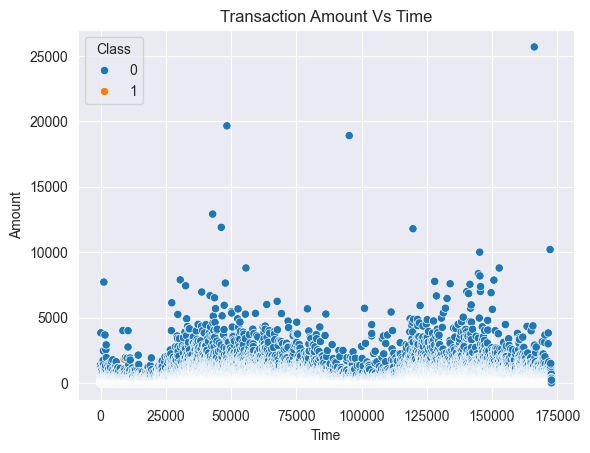

In [103]:
sns.scatterplot(x= 'Time' , y = 'Amount', hue = 'Class', data = data)
plt.title('Transaction Amount Vs Time')
plt.show()

<Axes: xlabel='Class', ylabel='Amount'>

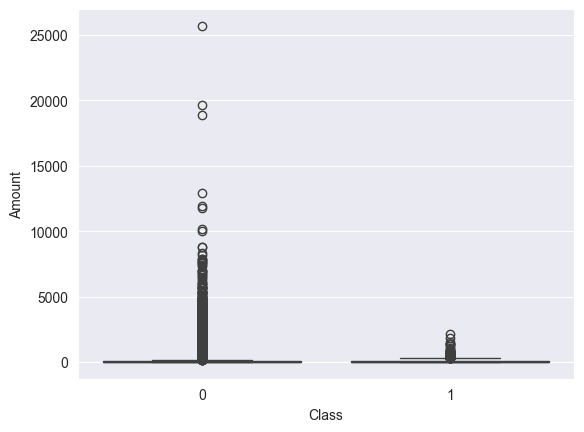

In [104]:
sns.boxplot(x = 'Class' , y = 'Amount', data = data)

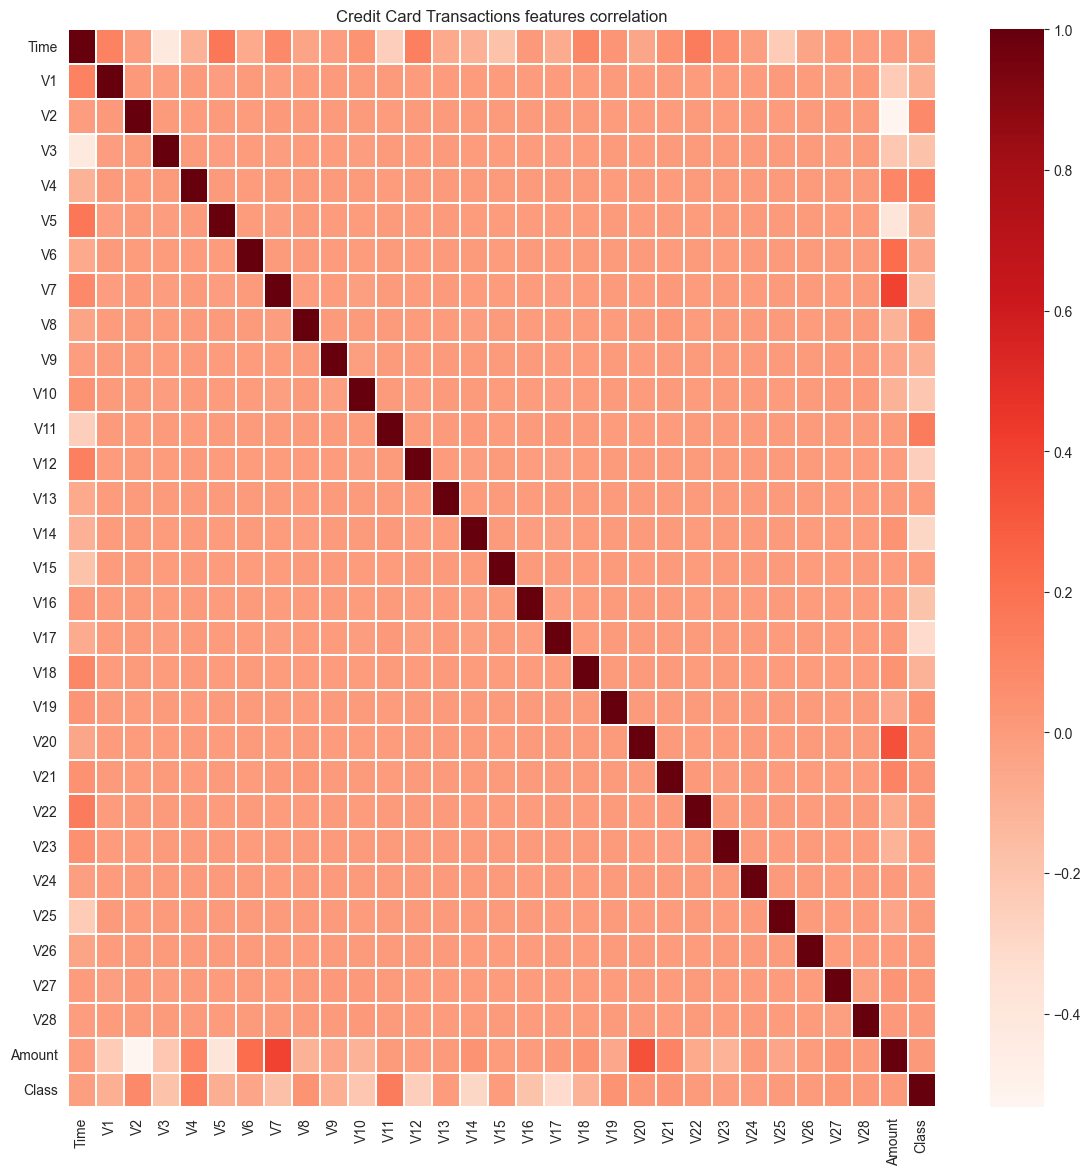

In [105]:
#Features Correlation
plt.figure(figsize = (14,14))
plt.title("Credit Card Transactions features correlation")
corr = data.corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1,cmap="Reds")
plt.show()

In [106]:
#separating both classes
legit = data[data.Class == 0]
fraud = data[data.Class == 1]

In [107]:
print(legit.shape)
legit.Amount.describe()

(283253, 31)


count    283253.000000
mean         88.413575
std         250.379023
min           0.000000
25%           5.670000
50%          22.000000
75%          77.460000
max       25691.160000
Name: Amount, dtype: float64

In [108]:
print(fraud.shape)
fraud.Amount.describe()

(473, 31)


count     473.000000
mean      123.871860
std       260.211041
min         0.000000
25%         1.000000
50%         9.820000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [109]:
#Significant difference in mean
#comparing values for both transactions
data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94835.058093,0.013439,-0.009829,0.012853,-0.010440,0.006769,0.001251,0.010447,-0.002448,0.002613,...,-0.000489,-0.00115,-0.000160,0.000360,0.000393,-0.000301,0.000065,0.001409,0.000418,88.413575
1,80450.513742,-4.498280,3.405965,-6.729599,4.472591,-2.957197,-1.432518,-5.175912,0.953255,-2.522124,...,0.405043,0.46655,0.086639,-0.096464,-0.106643,0.040615,0.050456,0.213774,0.078270,123.871860


Building a sample dataset of containing both legit and fraud transactions

In [110]:
#picking randomly 492 legit transactions and mixing with fraud transactions 
legit_sample = legit.sample(n = 492)
sample_data = pd.concat([legit_sample,fraud], axis = 0)
sample_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
19632,30426.0,-0.696838,1.329353,0.944481,0.660836,0.434668,-0.076087,0.756205,-0.102121,-0.373309,...,0.164030,0.567991,-0.165290,-0.261897,-0.239588,-0.305073,0.027490,0.229345,13.67,0
144105,85864.0,-2.513908,-2.081781,-0.041871,-1.087969,-2.411495,0.529079,2.627228,0.207087,-2.070956,...,0.165883,-0.754240,1.543525,-0.059581,0.765966,0.995780,-0.451321,-0.047238,794.70,0
130947,79465.0,1.189892,-0.365732,1.024676,-0.797021,-1.216730,-0.607513,-0.644905,0.078812,1.489093,...,0.057192,0.395975,-0.027609,0.570196,0.456038,-0.717954,0.092630,0.028013,1.00,0
45234,42259.0,-1.252131,0.727676,2.421193,0.967241,-0.510367,0.416816,0.648634,-0.411570,1.645587,...,-0.385356,-0.691721,-0.130003,0.342123,-0.219504,-0.725605,-1.114664,-0.263102,42.19,0
133283,80319.0,-0.763804,0.623008,2.034561,-0.074317,-0.067802,0.169144,0.899040,0.015282,-0.117213,...,-0.287505,-0.605829,-0.148950,-0.005099,0.300862,0.205974,0.072939,-0.107093,69.99,0


In [111]:
sample_data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,95328.085366,-0.102238,-0.063421,-0.019696,0.055323,0.065428,0.067265,-0.048201,0.009177,-0.000541,...,0.013935,-0.03684,-0.009745,-0.035024,-0.004144,0.023957,-0.020920,0.017064,-0.029607,95.363598
1,80450.513742,-4.498280,3.405965,-6.729599,4.472591,-2.957197,-1.432518,-5.175912,0.953255,-2.522124,...,0.405043,0.46655,0.086639,-0.096464,-0.106643,0.040615,0.050456,0.213774,0.078270,123.871860


Creating Model

In [112]:
X = sample_data.drop(columns = 'Class', axis = 1)
y = sample_data['Class']

In [113]:
#Splitting data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state= 0 )

In [114]:
model = LogisticRegression(max_iter=400)

In [115]:
model.fit(X_train, y_train)

C:\Users\saisa\PycharmProjects\pythonProject3\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=400)

In [116]:
X_train_prediction=model.predict(X_train)
training_accuracy=accuracy_score(X_train_prediction,y_train)
print("Training accuracy = ", training_accuracy)

Training accuracy =  0.9430051813471503


In [117]:
X_test_prediction=model.predict(X_test)
testing_accuracy=accuracy_score(X_test_prediction,y_test)
print("Training accuracy = ", testing_accuracy)

Training accuracy =  0.9430051813471503
